# Density Estimation with the Combination Technique


### Example with the circle scikit-learn dataset:

In [15]:
from sys import path
path.append('../src/')
%matplotlib inline
import numpy as np
from ErrorCalculator import *
from GridOperation import *
from StandardCombi import *
from sklearn import datasets

# dimension of the problem
dim = 2

# define the number of data points
size = 500

# define the domain boundaries
a = np.zeros(dim)
b = np.ones(dim)

# define a lambda value
lambd = 1e-5

# generate the data set for the specified amount of points and add noise
data = datasets.make_circles(size, noise = 0.05)

# initialize the grid operation (set print_output=False for reduced output printing)
operation = DensityEstimation(data, dim, lambd=lambd, print_output=True)

# initialize the StandardCombi with the grid operation
combiObject = StandardCombi(a, b, operation=operation)

0 [1, 5] 1.0
1 [2, 4] 1.0
2 [3, 3] 1.0
3 [4, 2] 1.0
4 [5, 1] 1.0
5 [1, 4] -1.0
6 [2, 3] -1.0
7 [3, 2] -1.0
8 [4, 1] -1.0
Indexlist:  [(1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (1, 9), (1, 10), (1, 11), (1, 12), (1, 13), (1, 14), (1, 15), (1, 16), (1, 17), (1, 18), (1, 19), (1, 20), (1, 21), (1, 22), (1, 23), (1, 24), (1, 25), (1, 26), (1, 27), (1, 28), (1, 29), (1, 30), (1, 31)]
Levelvector:  [1 5]
Diagonal value:  0.006944444444444444
----------------------------------------------------------------------------------------------------
Calculating
Gridpoints:  (1, 1) (1, 2)
Result:  0.001736111111111111
----------------------------------------------------------------------------------------------------
Skipping calculation
Gridpoints:  (1, 1) (1, 3)
----------------------------------------------------------------------------------------------------
Skipping calculation
Gridpoints:  (1, 1) (1, 4)
----------------------------------------------------------------------

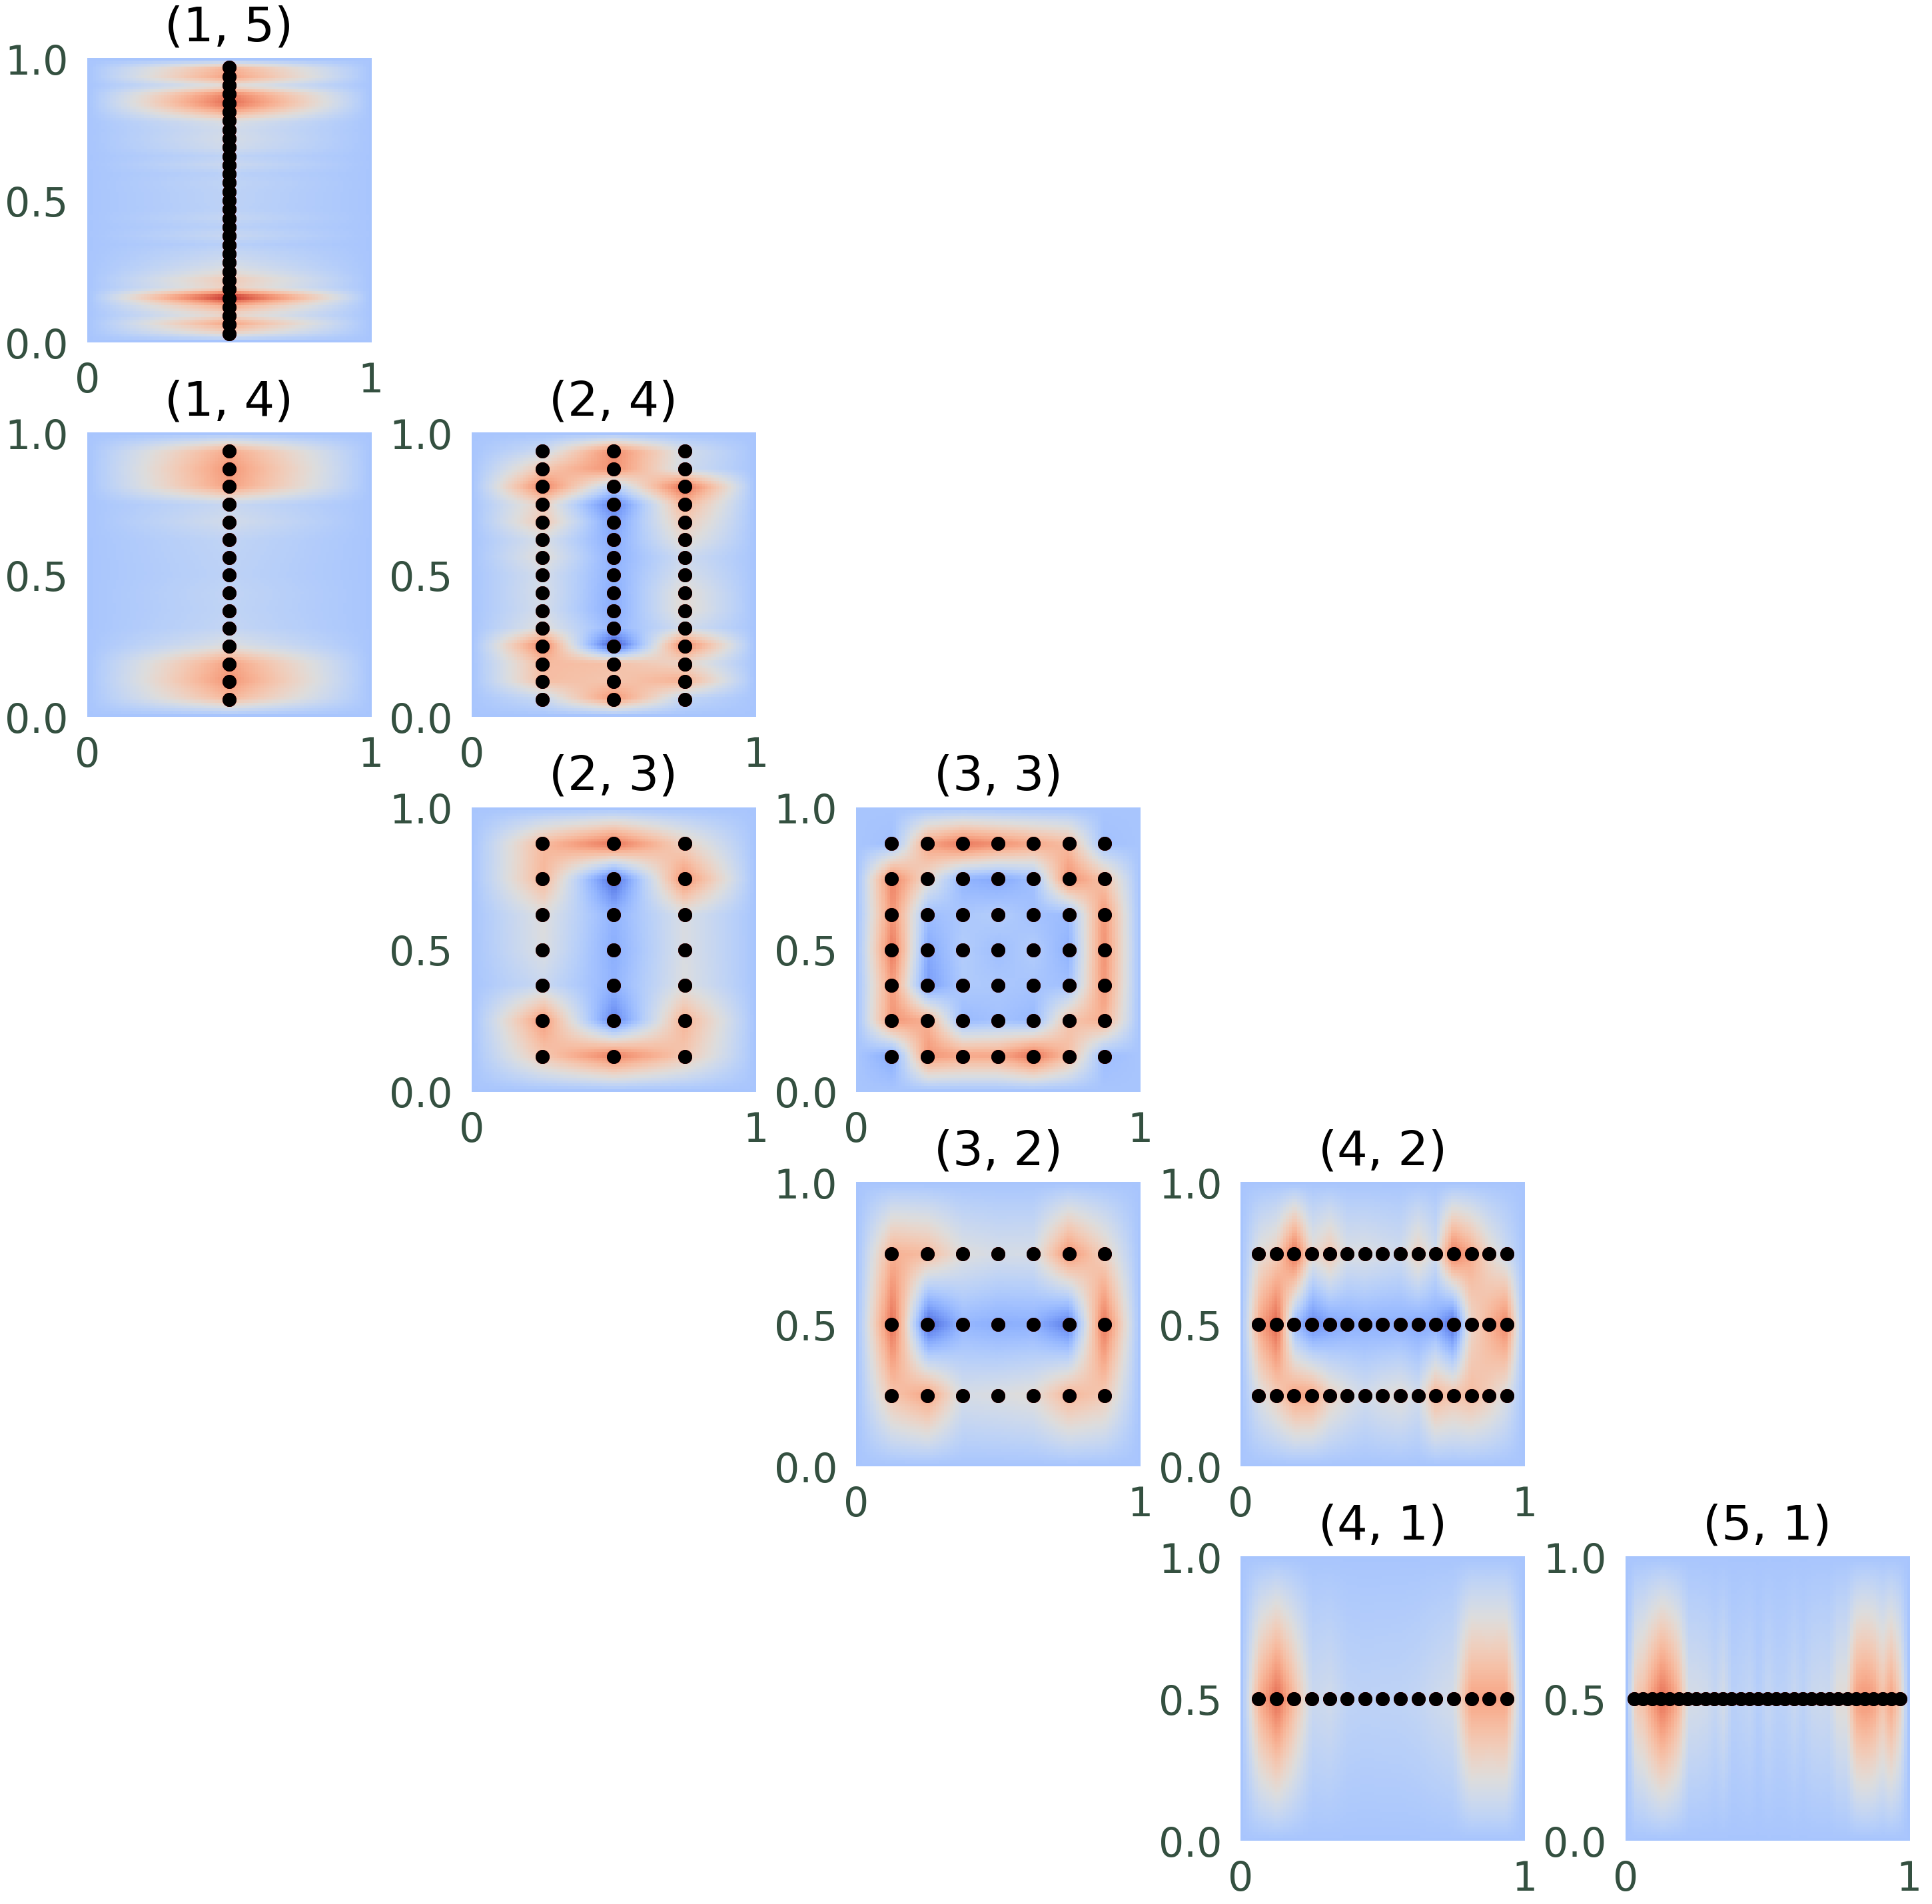

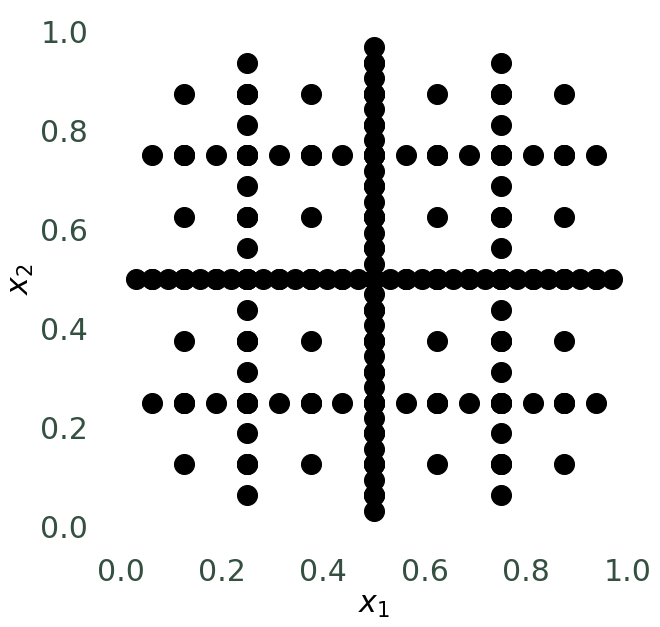

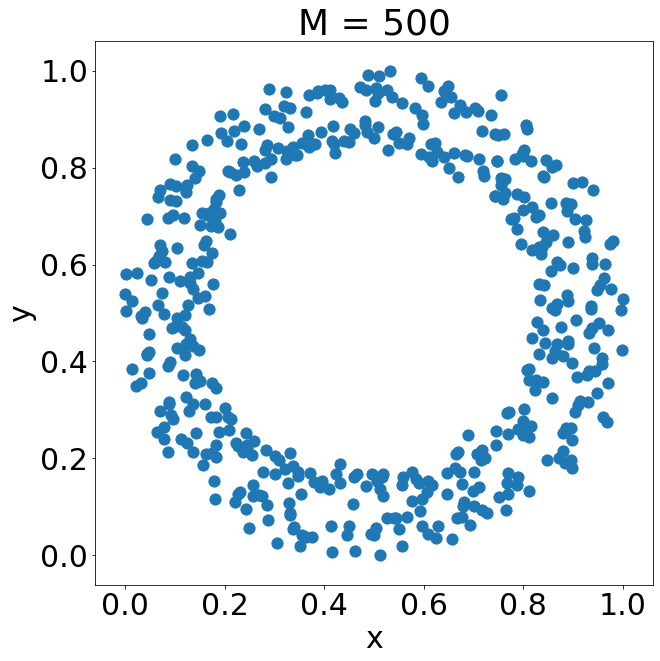

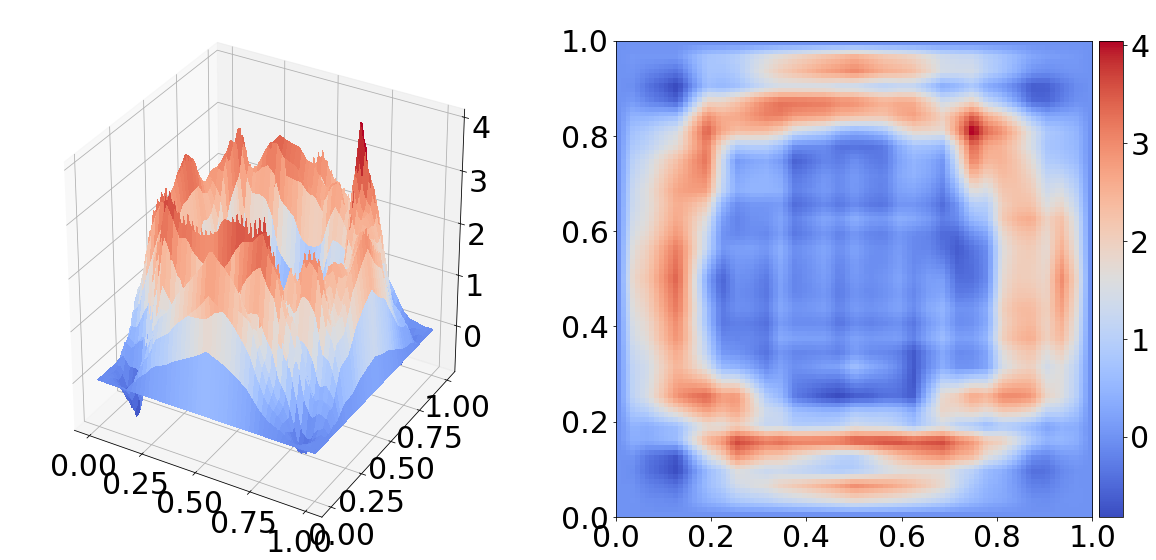

In [16]:
# define the min and max level for the combination scheme
minimum_level = 1
maximum_level = 5

# perform the density estimation operation, has to be done before the printing and plotting
combiObject.perform_operation(minimum_level, maximum_level)
print("Combination Scheme:")
# when you pass the operation, the function also plots the contour plot of each component grid
combiObject.print_resulting_combi_scheme(operation=operation)
print("Sparse Grid:")
combiObject.print_resulting_sparsegrid(markersize=20)
print("Plot of dataset:")
operation.plot_dataset()
print("Plot of density estimation:")
# when contour = True, the contour plot is shown next to the 3D plot
combiObject.plot(contour=True)

### Example with numpy random sampling:

0 [2, 5] 1.0
1 [3, 4] 1.0
2 [4, 3] 1.0
3 [5, 2] 1.0
4 [2, 4] -1.0
5 [3, 3] -1.0
6 [4, 2] -1.0
CombiSolution {(1, 5): array([1.68654632, 2.68975538, 1.50890587, 2.60275296, 4.63478505,
       1.65261928, 1.85534923, 1.18889099, 0.84740757, 0.61137719,
       0.32279725, 0.6594075 , 0.35559354, 0.60740281, 0.40903704,
       0.42857324, 0.43584004, 0.50183502, 0.35682021, 0.71095008,
       0.46209371, 0.85472731, 0.95505689, 0.87249313, 1.12800209,
       2.53473321, 3.6341975 , 3.33128789, 1.26466475, 2.74566642,
       2.42220932]), (2, 4): array([ 0.00833596, -0.22271972,  0.40452982,  0.61589068,  1.63889321,
        1.40447942,  4.30982756,  2.89399299,  2.74193354,  3.11696179,
        2.69833253,  1.25380548,  0.37629771,  0.14025418, -0.03750953,
        0.05704864,  0.51004369,  1.14056922,  1.69087392,  1.51255685,
        3.25519454,  5.7423682 ,  5.22971219,  5.32369636,  4.91573098,
        3.73319491,  1.09517155,  1.11895327,  0.51384556,  0.35785691,
       -0.03138654, 

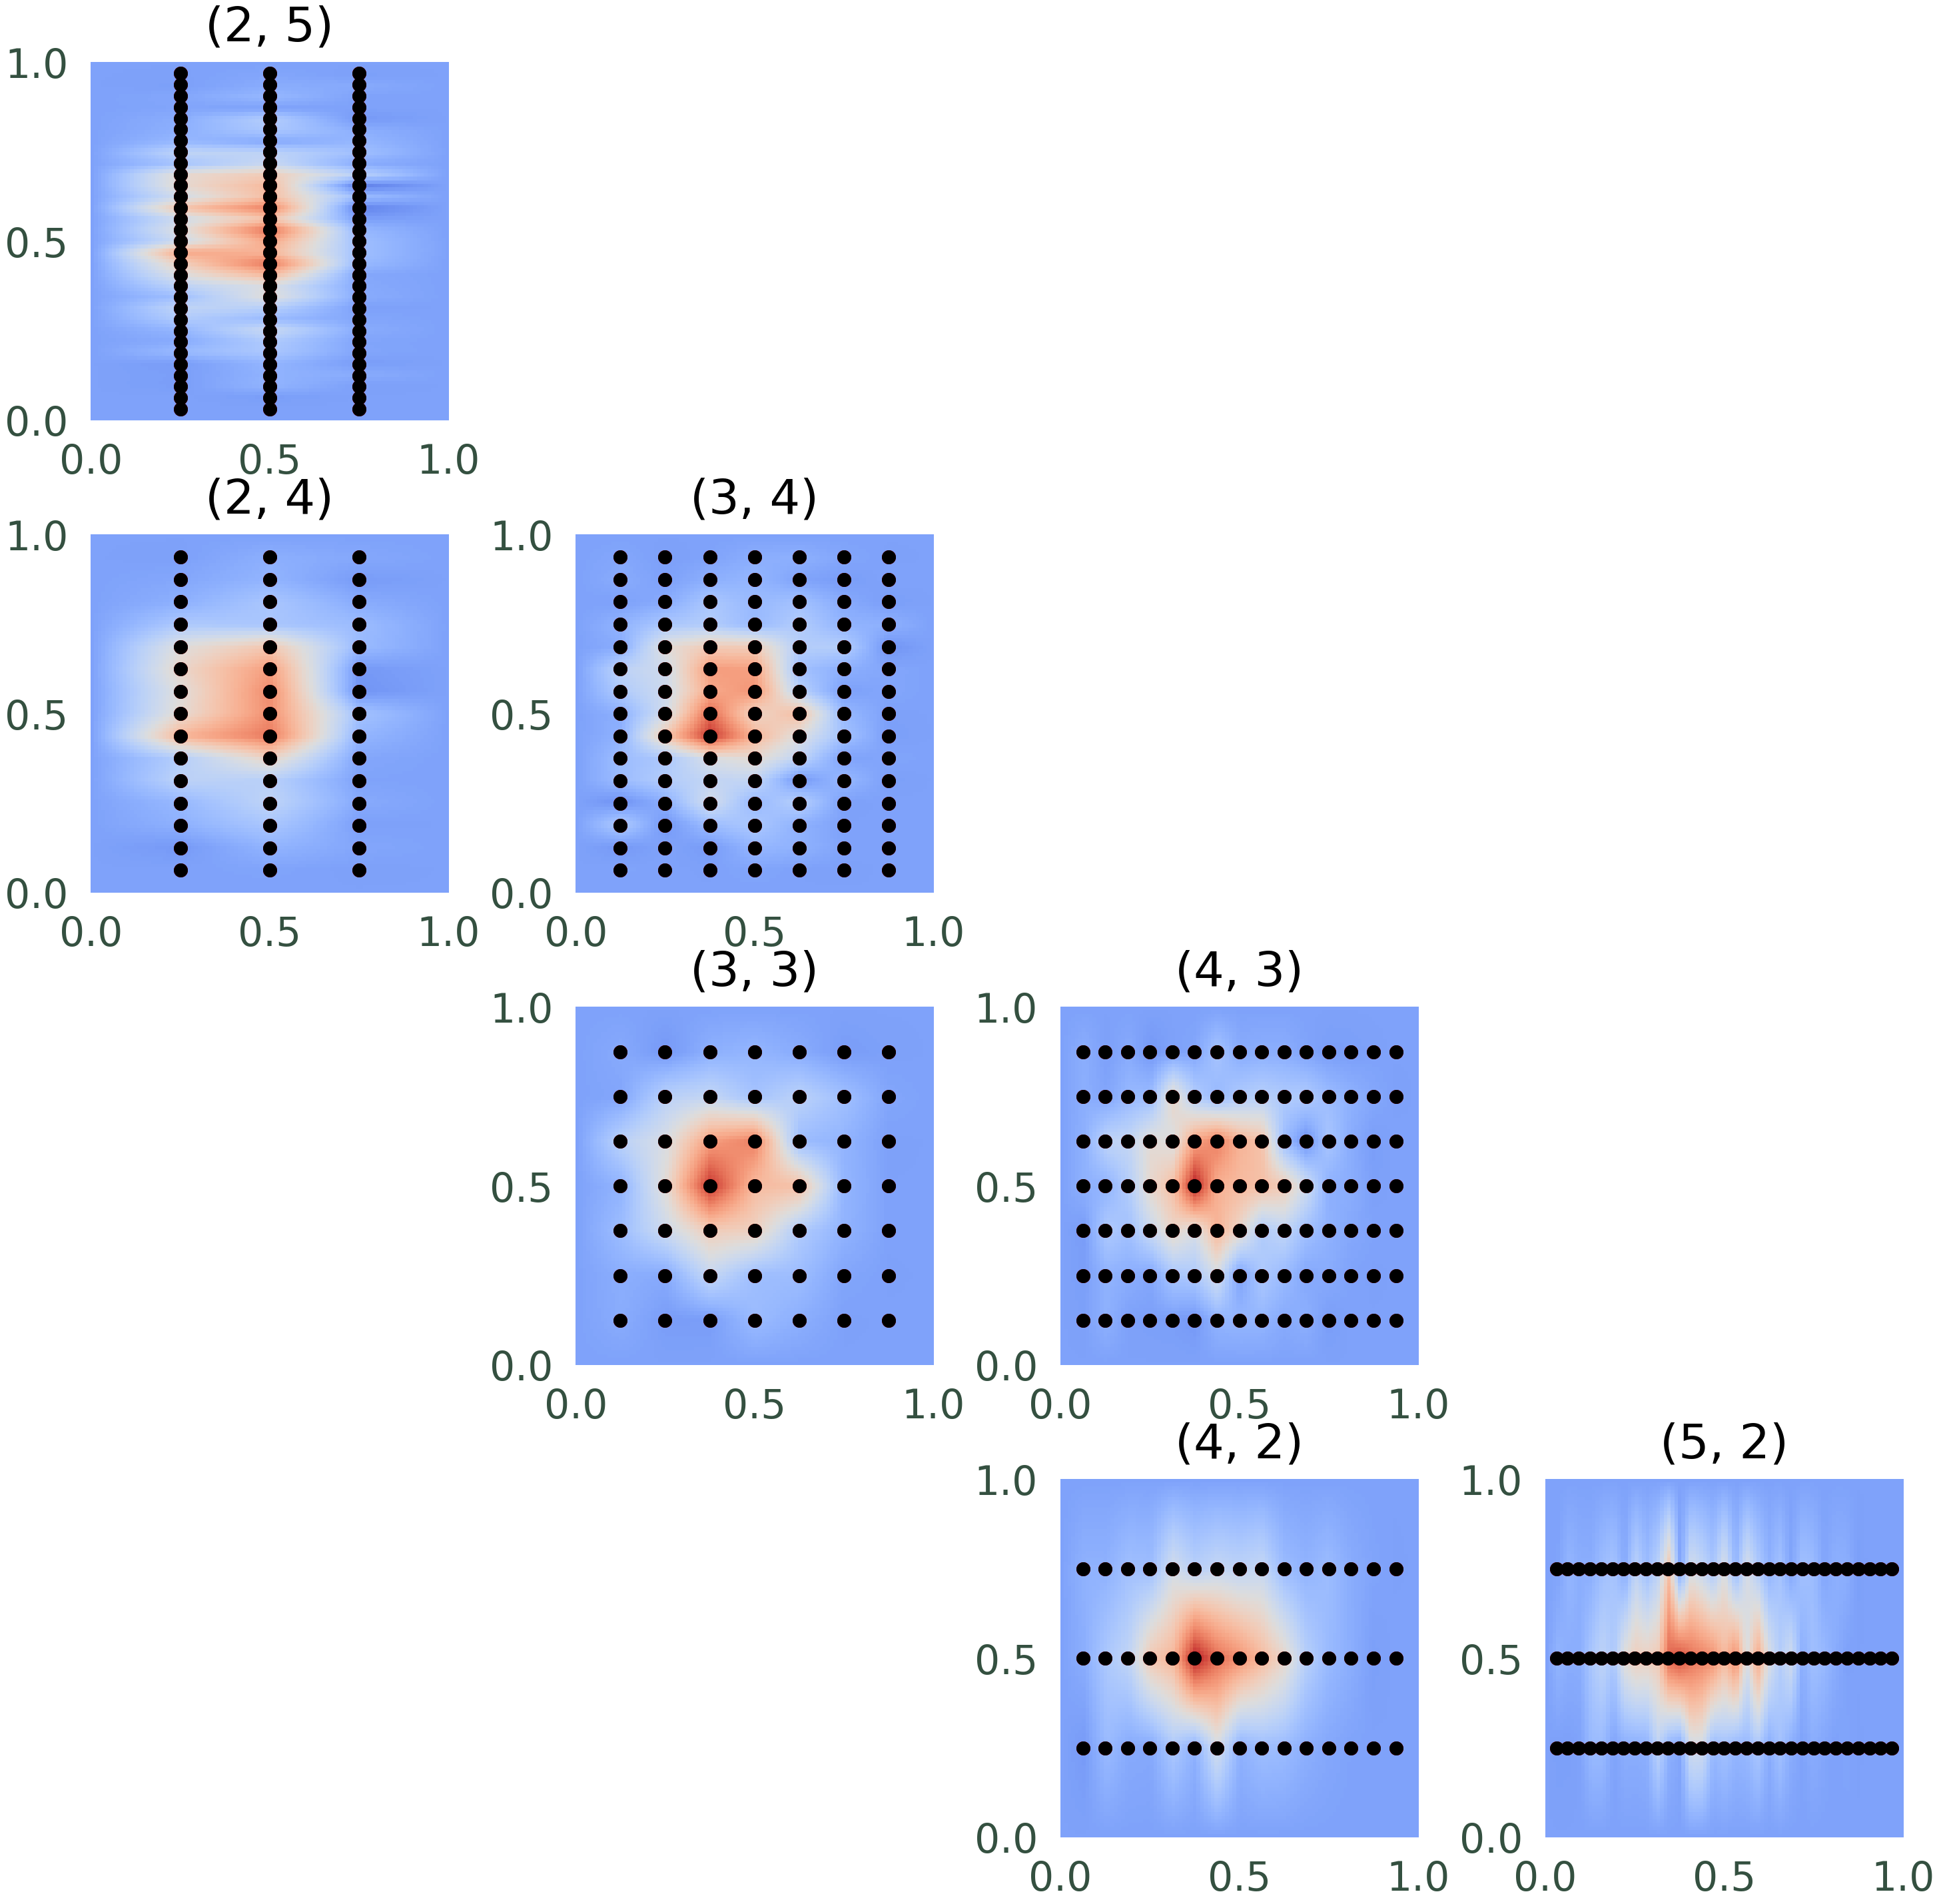

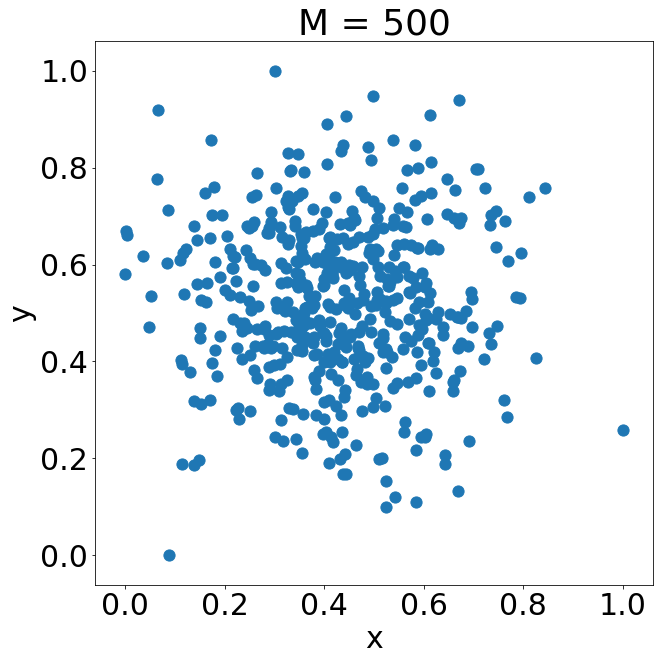

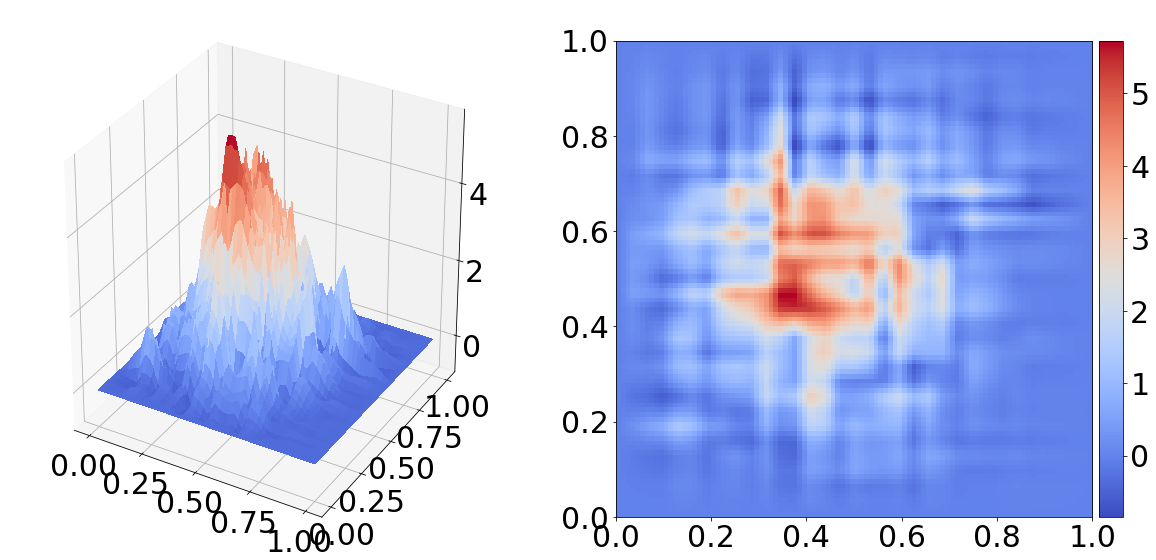

In [17]:
# For dimensions greater than 2 the estimated density function can not be plotted
dim = 2

# multivariate normal distribution
mean = [0.5] * dim
cov = np.identity(dim)*(1/16)
data = np.random.multivariate_normal(mean, cov, size)

# define a lambda value
lambd = 1e-3

# initialize the grid operation with the parameters
operation.data = data
operation.lambd = lambd
operation.print_output = False

# we can also set the minimum level to a different value than 1
# we get a different combi solution, because a different set of full grids is combined
minimum_level = 2
maximum_level = 5

# perform the density estimation operation
combiObject.perform_operation(minimum_level, maximum_level)
print("Combination Scheme:")
combiObject.print_resulting_combi_scheme(operation=operation)
print("Plot of dataset:")
operation.plot_dataset()
print("Plot of density estimation")
combiObject.plot(contour=True)

### Example with the old faithful geyser dataset:

0 [1, 4] 1.0
1 [2, 3] 1.0
2 [3, 2] 1.0
3 [4, 1] 1.0
4 [1, 3] -1.0
5 [2, 2] -1.0
6 [3, 1] -1.0
CombiSolution {(1, 5): array([1.68654632, 2.68975538, 1.50890587, 2.60275296, 4.63478505,
       1.65261928, 1.85534923, 1.18889099, 0.84740757, 0.61137719,
       0.32279725, 0.6594075 , 0.35559354, 0.60740281, 0.40903704,
       0.42857324, 0.43584004, 0.50183502, 0.35682021, 0.71095008,
       0.46209371, 0.85472731, 0.95505689, 0.87249313, 1.12800209,
       2.53473321, 3.6341975 , 3.33128789, 1.26466475, 2.74566642,
       2.42220932]), (2, 4): array([ 0.00833596, -0.22271972,  0.40452982,  0.61589068,  1.63889321,
        1.40447942,  4.30982756,  2.89399299,  2.74193354,  3.11696179,
        2.69833253,  1.25380548,  0.37629771,  0.14025418, -0.03750953,
        0.05704864,  0.51004369,  1.14056922,  1.69087392,  1.51255685,
        3.25519454,  5.7423682 ,  5.22971219,  5.32369636,  4.91573098,
        3.73319491,  1.09517155,  1.11895327,  0.51384556,  0.35785691,
       -0.03138654, 

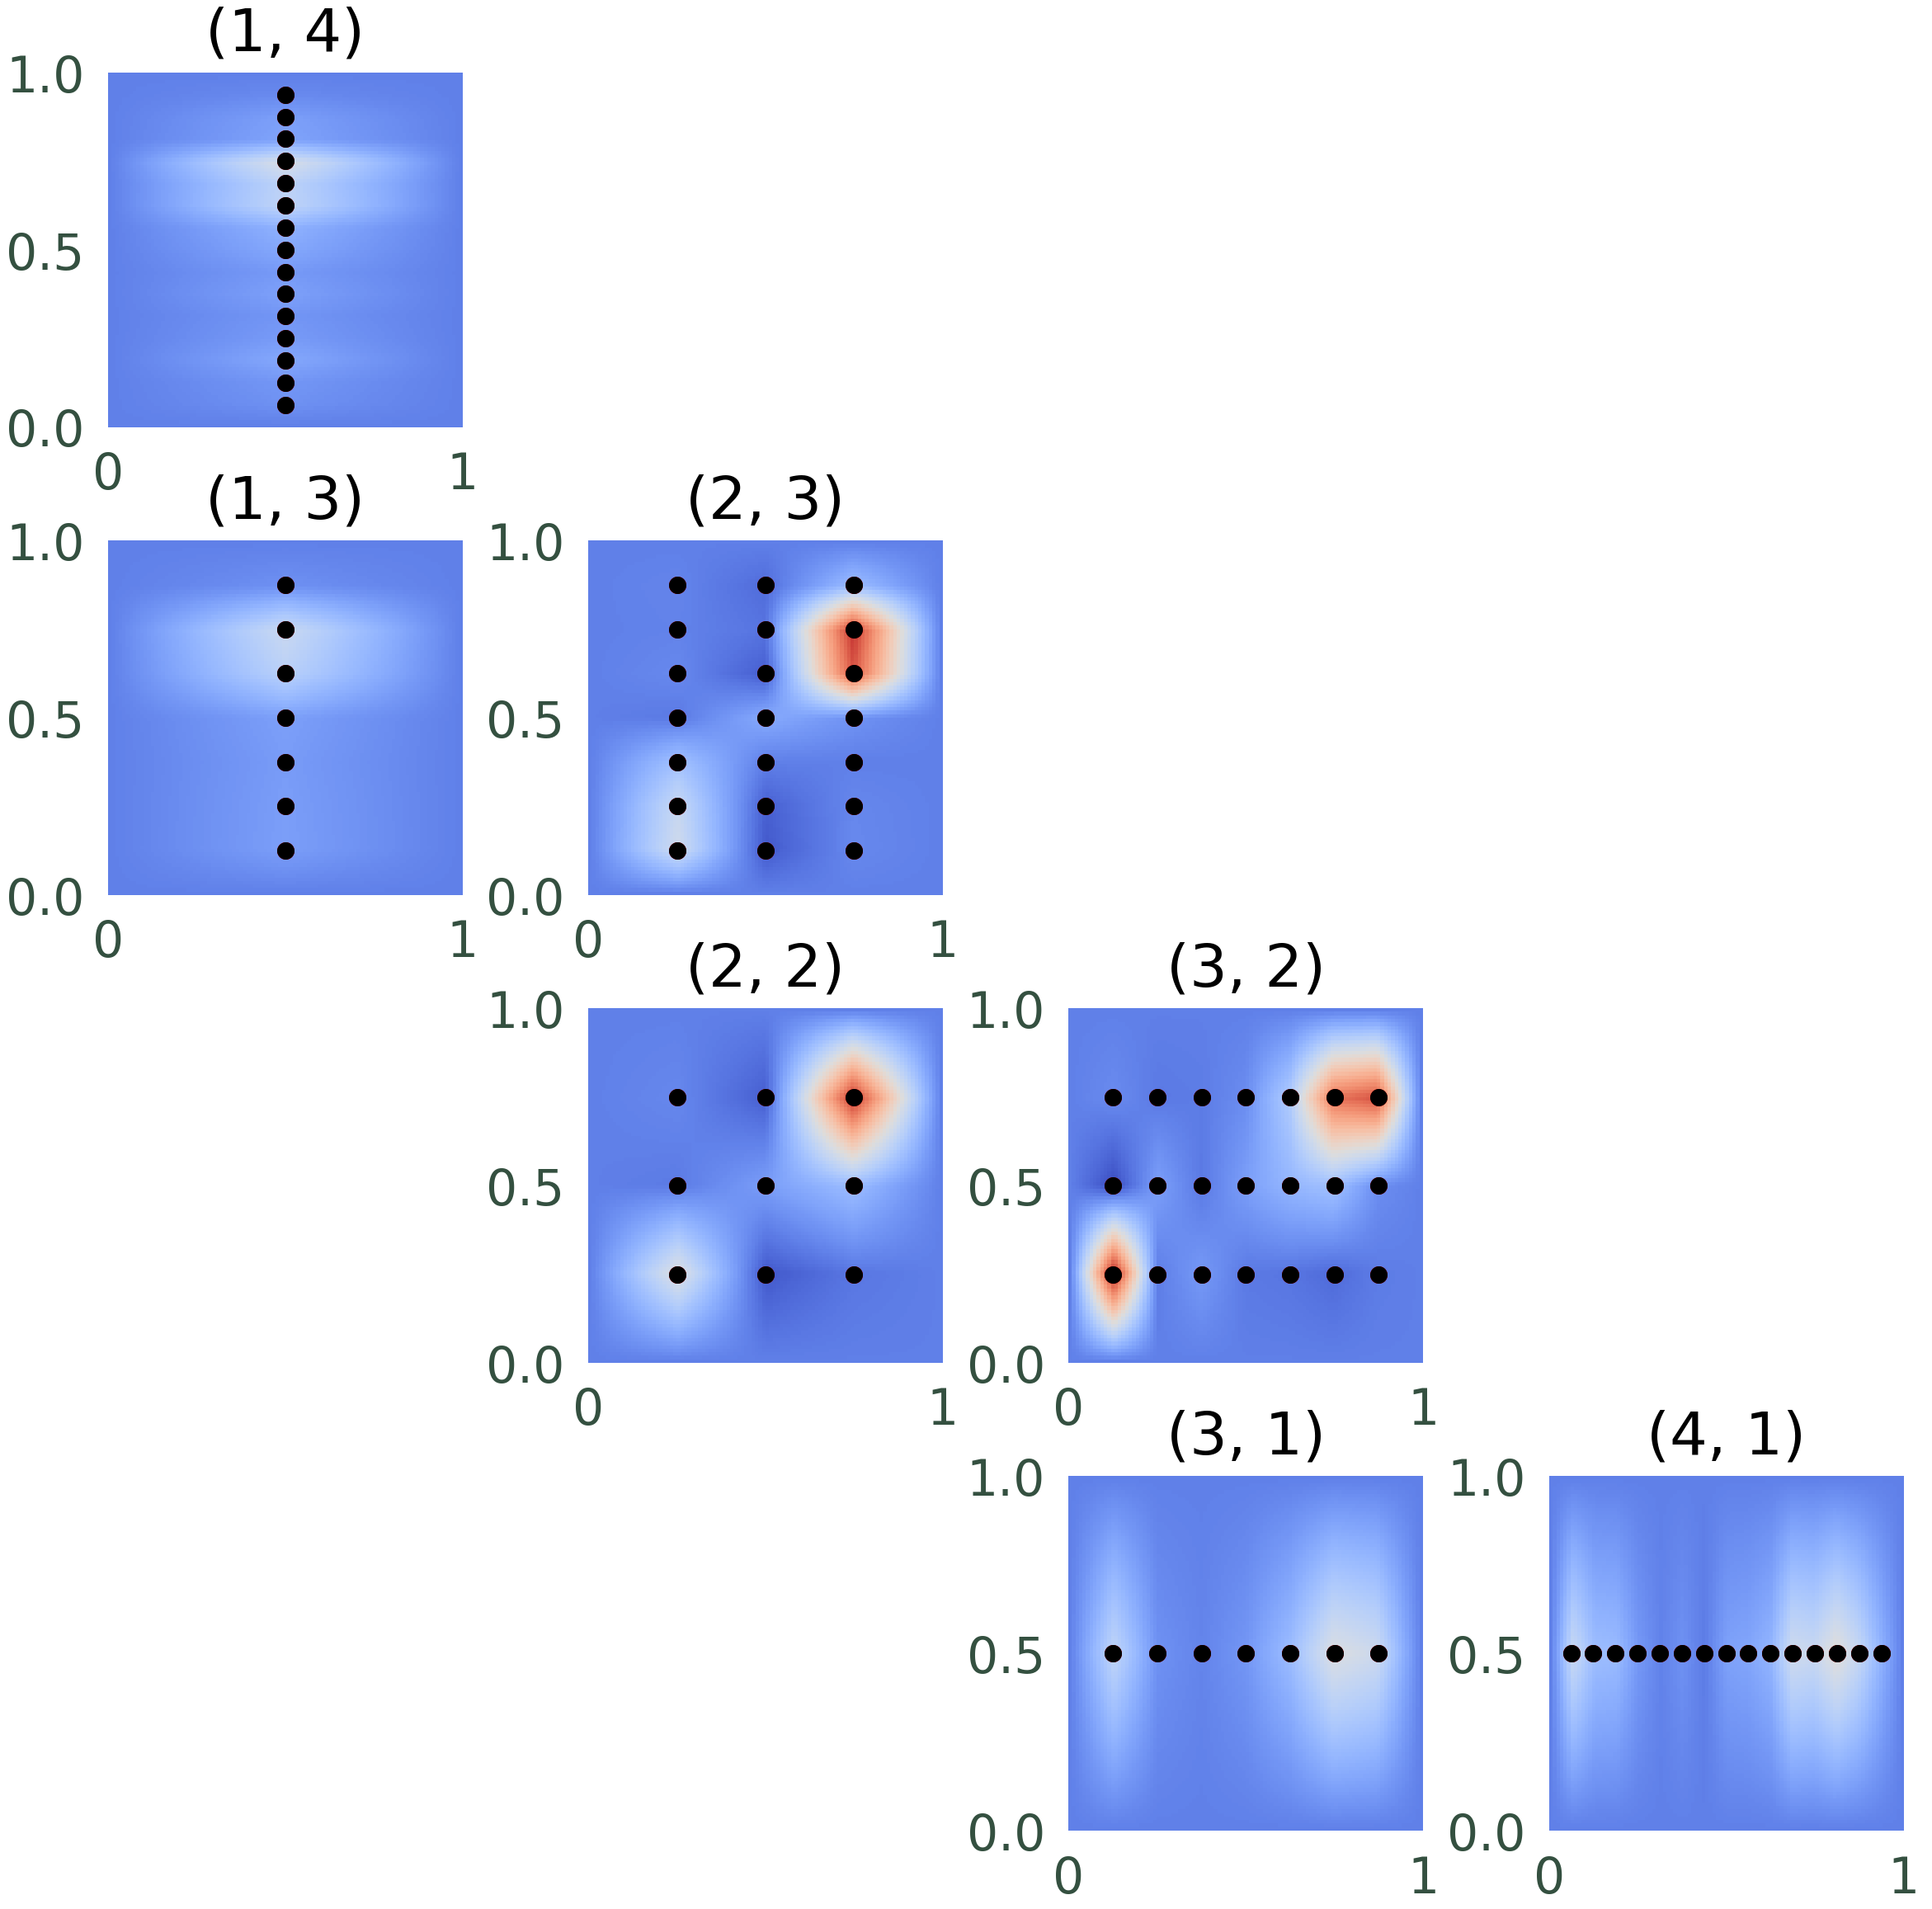

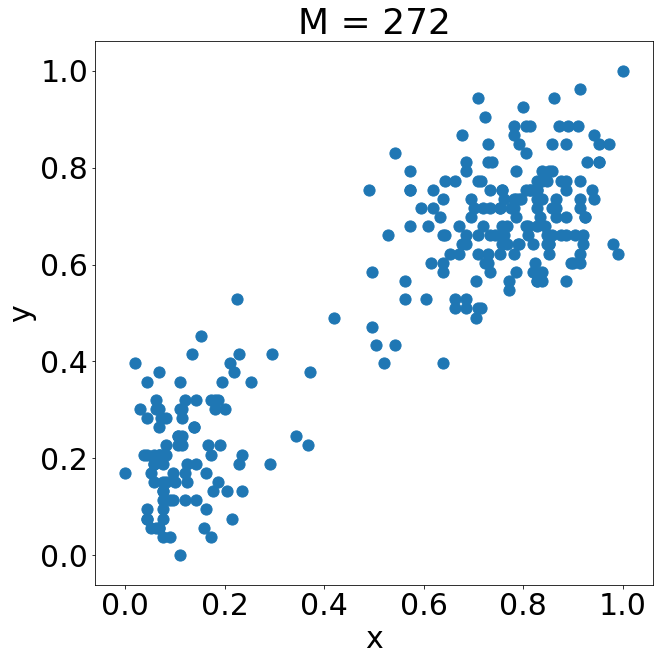

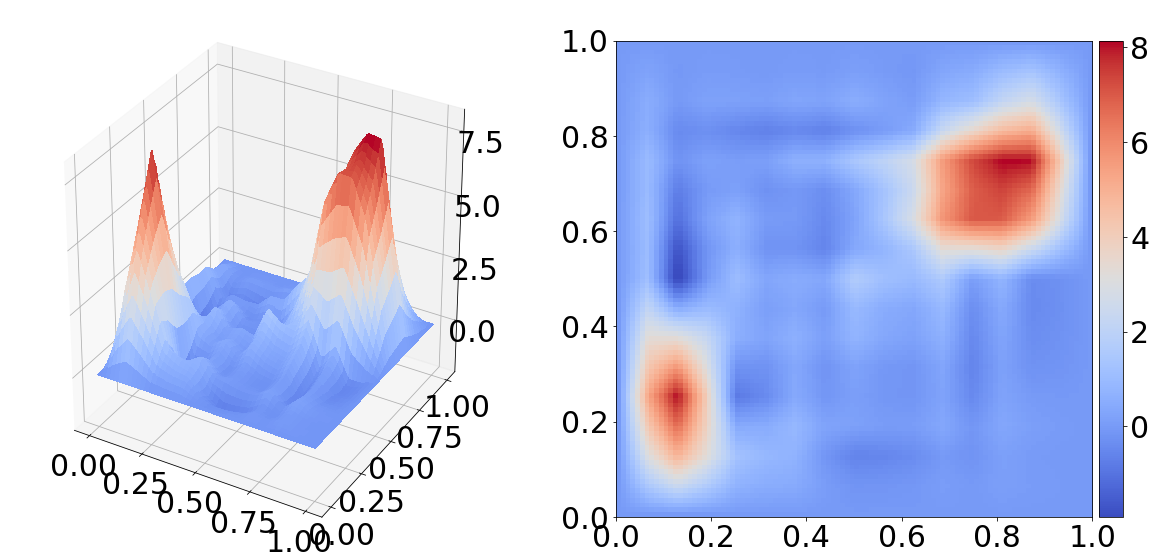

In [18]:
# real world eruption data of the Old Faithful Geyser in Yellowstone National Park
# contains 272 observations with 2 variables (dimensions)
oldFaithfulDataset = "../SGDE/Datasets/faithful.csv"

# define a lambda value
lambd = 0.0

# initialize the grid operation with the parameters
operation.data = oldFaithfulDataset
operation.lambd = lambd

# combi grid of level 4
minimum_level = 1
maximum_level = 4

# perform the density estimation operation
combiObject.perform_operation(minimum_level, maximum_level)
print("Combination Scheme:")
combiObject.print_resulting_combi_scheme(operation=operation)
print("Plot of dataset:")
operation.plot_dataset()
print("Plot of density estimation")
combiObject.plot(contour=True)